# Create z-score files

This notebook creates mean/std files for the paper. Resdidual coefficients are defined in a separated notebook.

In [1]:
import os
import yaml
import numpy as np
import xarray as xr

## ERA5 mean std for precip dscale baseline

In [2]:
# get variable information from data_preprocessing/config
config_name = os.path.realpath('data_config_dscale.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

In [3]:
N_levels = 11

base_dir = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/dscale_BCSD/'
ds_example = xr.open_zarr(base_dir+'ERA5_GP_1h_2020.zarr')
level = np.array(ds_example['level'])

In [5]:
varnames = list(conf['zscore'].keys())
varnames = varnames[:-3] # remove save_loc and others
varname_surf = list(set(varnames) - set(['U', 'V', 'T', 'Q', 'Z']))
varname_upper = ['U', 'V', 'T', 'Q', 'Z']

# collect computed mean and variance values
# See "qsub_STEP01_compute_mean_std.ipynb"
MEAN_values = {}
STD_values = {}

for varname in varname_surf:
    save_name = conf['zscore']['save_loc'] + '{}_mean_std_{}.npy'.format(
        conf['zscore']['prefix'], varname)
    
    mean_std = np.load(save_name)
    MEAN_values[varname] = mean_std[0]
    STD_values[varname] = mean_std[1]

for varname in varname_upper:

    # -------------------------------------------- #
    # allocate all levels
    mean_std_all_levels = np.empty((2, N_levels))
    mean_std_all_levels[...] = np.nan
    
    for i_level in range(N_levels):
        save_name = conf['zscore']['save_loc'] + '{}_level{}_mean_std_{}.npy'.format(
            conf['zscore']['prefix'], i_level, varname)
        
        mean_std = np.load(save_name)
        mean_std_all_levels[:, i_level] = mean_std

    # -------------------------------------------- #
    # save
    MEAN_values[varname] = np.copy(mean_std_all_levels[0, :])
    STD_values[varname] = np.copy(mean_std_all_levels[1, :])

In [6]:
# ------------------------------------------------------- #
# Initialize dataset
ds_mean_6h = xr.Dataset(coords={"level": level})

for varname, data in MEAN_values.items():
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["level",],
            coords={"level": level},
            name=varname,
        )
        ds_mean_6h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_mean_6h[varname] = data_array

In [8]:
# ds_mean_6h.to_netcdf('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_dscale_mean_1980_2019.nc')

In [9]:
# ------------------------------------------------------- #
# create xr.DataArray for std

# use the same level coord as mean
ds_std_6h = xr.Dataset(coords={"level": level})

for varname, data in STD_values.items():
    data = np.sqrt(data)
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["level",],
            coords={"level": level},
            name=varname,
        )
        ds_std_6h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_std_6h[varname] = data_array

In [10]:
# ds_std_6h.to_netcdf('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_dscale_std_1980_2019.nc')

In [12]:
ds_1h = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_1h_mean_1980_2019.nc')
ds_3h = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_dscale_mean_1980_2019.nc')
ds_6h = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_6h_mean_1980_2019_new.nc')

for varname in ds_6h.keys():
    print(f'=================== {varname} ===================')
    print(ds_1h[varname].values)
    print(ds_3h[varname].values)
    print(ds_6h[varname].values)

=================== VAR_2T ===================
290.24993206150936
290.24993206150936
290.2371073078752
=================== MSL ===================
101636.41257755288
101636.41257755288
101637.26440903403
=================== VAR_10V ===================
0.8680343950206532
0.8680343950206532
0.8502479162962644
=================== VAR_10U ===================
-0.25030913464869975
-0.25030913464869975
-0.26840238407599093
=================== U ===================
[-0.33185479  0.06156165  2.7636349   6.43461949  8.83315909 11.5980827
 14.94519049 19.52381634 24.86558663 14.32731949  0.73252808]
[-0.33185479  0.06156165  2.7636349   6.43461949  8.83315909 11.5980827
 14.94519049 19.52381634 24.86558663 14.32731949  0.73252808]
[-0.34497488  0.06344222  2.77553813  6.44195353  8.83725748 11.60020036
 14.94384259 19.52471682 24.86964996 14.31654628  0.71797722]
=================== V ===================
[ 8.91232632e-01  1.93514429e+00  2.16857855e+00  4.00630493e-01
 -5.05773017e-02 -2.22231250

### Std file

In [40]:
# ------------------------------------------------------- #
# create xr.DataArray for std

# use the same level coord as mean
ds_std_6h = xr.Dataset(coords={"level": level})

for varname, data in STD_values.items():
    data = np.sqrt(data)
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["level",],
            coords={"level": level},
            name=varname,
        )
        ds_std_6h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_std_6h[varname] = data_array

In [41]:
# ds_std_6h.to_netcdf('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_6h_std_1980_2019_new.nc')

In [44]:
ds_1h = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_1h_std_1980_2019.nc')
ds_3h = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_3h_std_1980_2019.nc')
ds_6h = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/ERA5_6h_std_1980_2019_new.nc')

for varname in ds_3h.keys():
    print(f'=================== {varname} ===================')
    print(ds_1h[varname].values)
    print(ds_3h[varname].values)
    print(ds_6h[varname].values)

=================== VAR_2T ===================
10.247993083807435
10.253738201019486
10.289591607654412
=================== MSL ===================
669.9659570237094
669.4589901534357
669.8582097416835
=================== VAR_10V ===================
3.374755264393826
3.377895893264416
3.3414763870614115
=================== VAR_10U ===================
2.386850981071745
2.3918602602295924
2.355377927474333
=================== U ===================
[ 2.63367104  4.44239616  5.88935308  7.11967466  8.7584726  10.62246097
 13.00254919 16.20291539 18.33228114 12.1271563   8.47524047]
[ 2.63879745  4.44049216  5.8813855   7.1103909   8.7521183  10.6184807
 12.99767326 16.19460319 18.32331105 12.12329474  8.48019539]
[ 2.61387451  4.41285444  5.87969879  7.12142802  8.76210002 10.62767134
 13.00917894 16.2094556  18.33719387 12.13399279  8.4743861 ]
=================== V ===================
[ 3.67769118  6.24311224  7.73405468  7.42114644  8.35118566  9.71673973
 11.68827644 14.35899643 14.848

## WRF mean std

In [2]:
# get variable information from data_preprocessing/config
config_name = os.path.realpath('data_config_WRF.yml')

with open(config_name, 'r') as stream:
    conf = yaml.safe_load(stream)

In [4]:
N_levels = 12

base_dir = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/C404_land/'
ds_example = xr.open_zarr(base_dir+'C404_GP_1980.zarr')
level = np.array(ds_example['bottom_top'])

In [5]:
# ds_example

In [7]:
varnames = list(conf['zscore'].keys())
varnames = varnames[:-3] # remove save_loc and others
varname_upper = ['WRF_U', 'WRF_V', 'WRF_T', 'WRF_P', 'WRF_Q_tot', 'WRF_Q_tot_05', 'WRF_W', 'WRF_Z']
varname_surf = list(set(varnames) - set(varname_upper))

# collect computed mean and variance values
# See "qsub_STEP01_compute_mean_std.ipynb"
MEAN_values = {}
STD_values = {}

for varname in varname_surf:
    save_name = conf['zscore']['save_loc'] + '{}_mean_std_{}.npy'.format(
        conf['zscore']['prefix'], varname)
    
    mean_std = np.load(save_name)
    MEAN_values[varname] = mean_std[0]
    STD_values[varname] = mean_std[1]

for varname in varname_upper:

    # -------------------------------------------- #
    # allocate all levels
    mean_std_all_levels = np.empty((2, N_levels))
    mean_std_all_levels[...] = np.nan
    
    for i_level in range(N_levels):
        save_name = conf['zscore']['save_loc'] + '{}_level{}_mean_std_{}.npy'.format(
            conf['zscore']['prefix'], i_level, varname)
        
        mean_std = np.load(save_name)
        mean_std_all_levels[:, i_level] = mean_std

    # -------------------------------------------- #
    # save
    MEAN_values[varname] = np.copy(mean_std_all_levels[0, :])
    STD_values[varname] = np.copy(mean_std_all_levels[1, :])

In [8]:
# ------------------------------------------------------- #
# Initialize dataset
ds_mean_6h = xr.Dataset(coords={'bottom_top': level})

for varname, data in MEAN_values.items():
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["bottom_top",],
            coords={"bottom_top": level},
            name=varname,
        )
        ds_mean_6h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_mean_6h[varname] = data_array

In [9]:
ds_mean_6h.to_netcdf('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_mean_1980_2019_12lev.nc')

In [10]:
ds_new = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_mean_1980_2019_12lev.nc')
ds_old = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_mean_1980_2019_15lev_20250629.nc')

for varname in ds_old.keys():
    print(f'=================== {varname} ===================')
    try:
        print(ds_old[varname].values)
        print(ds_new [varname].values)
    except:
        pass

=================== WRF_radar_composite ===================
2.366863667811179
2.366863667811179
=================== WRF_U10 ===================
-0.33428671976281354
-0.3342867197628134
=================== WRF_precip ===================
0.11036608059935528
0.11036608059935528
=================== WRF_SWDOWN ===================
213.64847886680724
213.64847886680724
=================== WRF_T2 ===================
289.9651692517908
289.9651692517908
=================== WRF_IVT_U ===================
73.96924217924376
=================== WRF_TCC ===================
0.47782415343560886
0.47782415343560886
=================== WRF_precip_025 ===================
0.10322347222812078
0.10322347222812078
=================== WRF_MSLP ===================
101950.03509385358
98178.72452439737
=================== WRF_radar_composite_025 ===================
0.2986099730471828
0.2986099730471828
=================== WRF_PWAT ===================
0.023409101635668436
0.023409101635668436
=================== WR

In [12]:
# ------------------------------------------------------- #
# create xr.DataArray for std

# use the same level coord as mean
ds_std_6h = xr.Dataset(coords={'bottom_top': level})

for varname, data in STD_values.items():
    data = np.sqrt(data)
    if len(data.shape) == 1:
        data_array = xr.DataArray(
            data,
            dims=["bottom_top",],
            coords={"bottom_top": level},
            name=varname,
        )
        ds_std_6h[varname] = data_array
    else:
        data_array = xr.DataArray(
            data,
            name=varname,
        )
        ds_std_6h[varname] = data_array

In [13]:
ds_std_6h.to_netcdf('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_std_1980_2019_12lev.nc')

In [14]:
ds_new = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_std_1980_2019_12lev.nc')
ds_old = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_std_1980_2019_15lev_20250629.nc')

for varname in ds_old.keys():
    print(f'=================== {varname} ===================')
    try:
        print(ds_old[varname].values)
        print(ds_new [varname].values)
    except:
        pass

=================== WRF_radar_composite ===================
7.0917343159386075
7.0917343159386075
=================== WRF_U10 ===================
2.378519653419203
2.378519653419203
=================== WRF_precip ===================
1.0634725429860916
1.0634725429860914
=================== WRF_SWDOWN ===================
305.8034557250422
305.8034557250422
=================== WRF_T2 ===================
10.663640428370755
10.663640428370755
=================== WRF_IVT_U ===================
133.75829877866965
=================== WRF_TCC ===================
0.4985328685369063
0.4985328685369063
=================== WRF_precip_025 ===================
0.2541216707417403
0.2541216707417403
=================== WRF_MSLP ===================
687.4544926099671
3523.4324601980798
=================== WRF_radar_composite_025 ===================
0.694507697008804
0.694507697008804
=================== WRF_PWAT ===================
0.01355639332377419
0.01355639332377419
=================== WRF_PWAT_05 ==

In [10]:
ds_new = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_std_1980_2019_12lev.nc')
ds_old = xr.open_dataset('/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/mean_std/C404_std_1980_2019_15lev_20250629.nc')

for varname in ds_old.keys():
    print(f'=================== {varname} ===================')
    try:
        print(ds_old[varname].values)
        print(ds_new [varname].values)
    except:
        pass

=================== WRF_radar_composite ===================
7.0917343159386075
7.0917343159386075
=================== WRF_U10 ===================
2.378519653419203
2.378519653419203
=================== WRF_precip ===================
1.0634725429860916
1.0634725429860914
=================== WRF_SWDOWN ===================
305.8034557250422
305.8034557250422
=================== WRF_T2 ===================
10.663640428370755
10.663640428370755
=================== WRF_IVT_U ===================
133.75829877866965
=================== WRF_TCC ===================
0.4985328685369063
0.4985328685369063
=================== WRF_precip_025 ===================
0.2541216707417403
0.2541216707417403
=================== WRF_MSLP ===================
687.4544926099671
3523.4324601980798
=================== WRF_radar_composite_025 ===================
0.694507697008804
0.694507697008804
=================== WRF_PWAT ===================
0.01355639332377419
0.01355639332377419
=================== WRF_PWAT_05 ==

## Distribution checks

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# SP = ds_example['WRF_SP'].isel(time=999).values
# plt.pcolormesh(SP)
# plt.colorbar()

In [ ]:
base_dir = '/glade/derecho/scratch/ksha/DWC_data/CONUS_domain_GP/all_in_one/'
ds_example = xr.open_zarr(base_dir+'C404_GP_1980.zarr')

In [47]:
WRF_PWAT = ds_example['WRF_PWAT'].isel(time=999).values

In [32]:
WRF_precip = ds_example['WRF_precip'].isel(time=999).values

In [81]:
WRF_radar_composite = ds_example['WRF_radar_composite'].isel(time=0).values

In [87]:
WRF_IVT_U = ds_example['WRF_IVT_U'].isel(time=0).values

In [82]:
WRF_OLR = ds_example['WRF_OLR'].isel(time=0).values

In [98]:
WRF_Q = ds_example['WRF_Q_tot'].isel(time=0).values

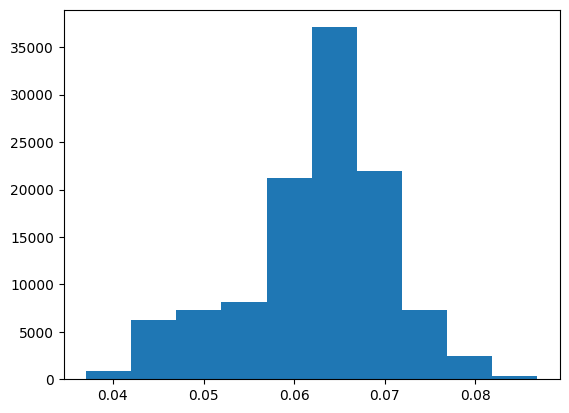

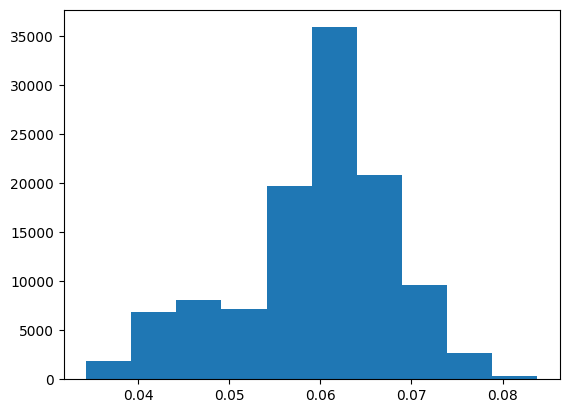

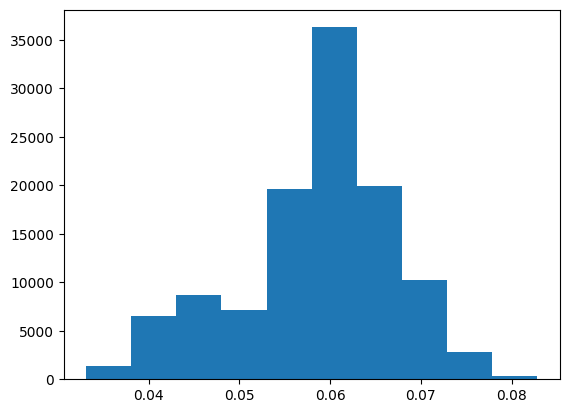

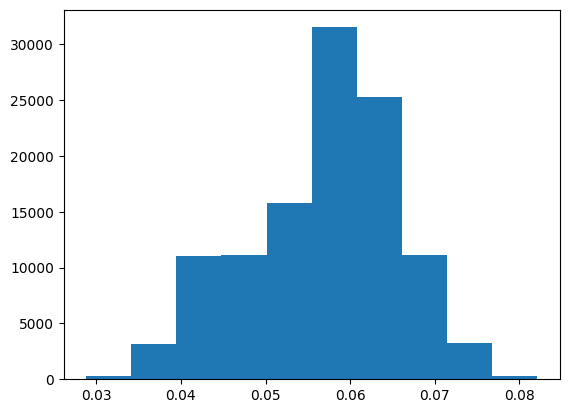

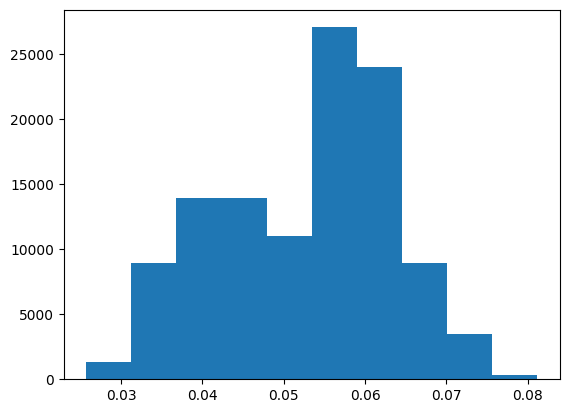

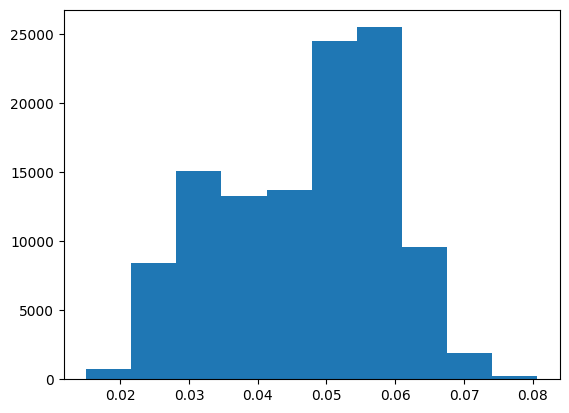

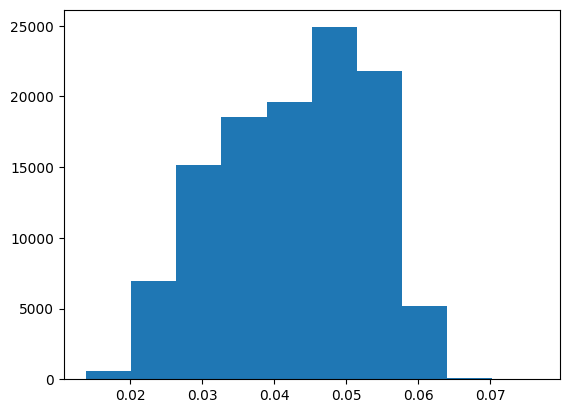

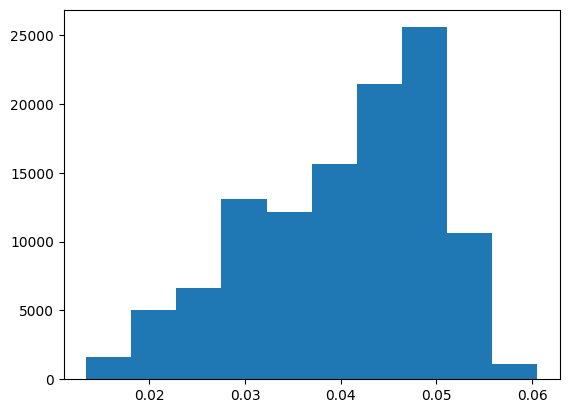

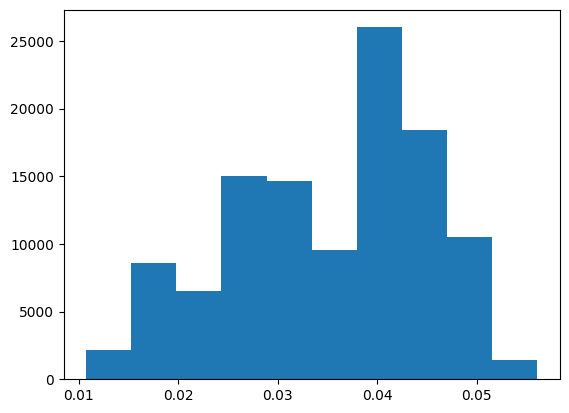

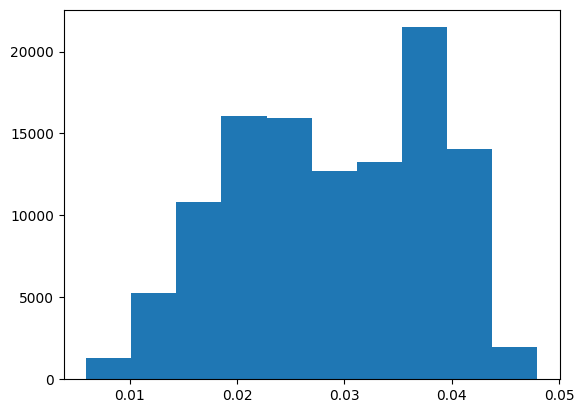

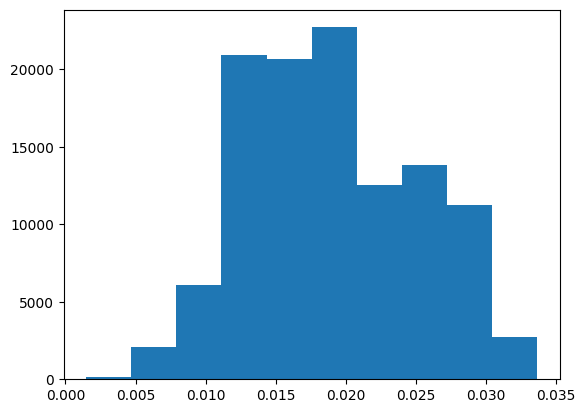

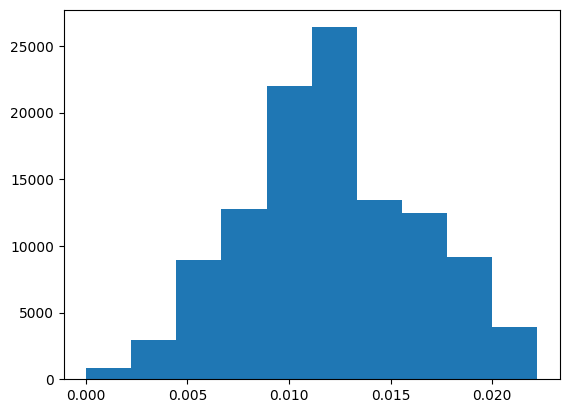

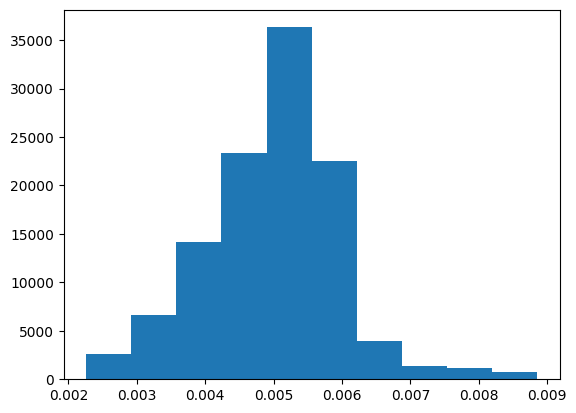

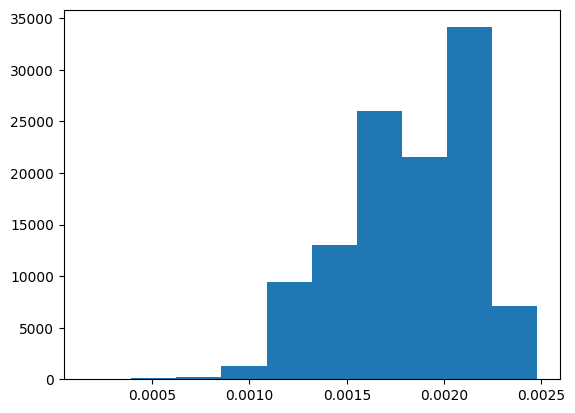

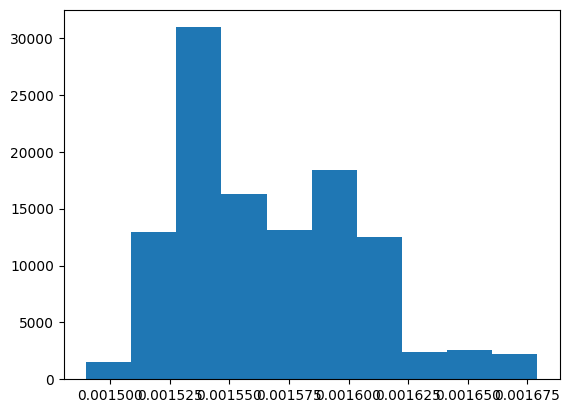

In [99]:
# plt.pcolormesh(WRF_Q[-1, ...], cmap=plt.cm.jet)
# plt.colorbar()

for i in range(15):
    plt.figure()
    plt.hist(WRF_Q[i, ...].ravel()**0.5);

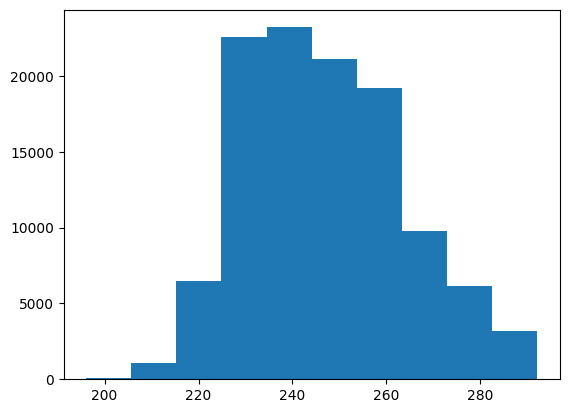

In [86]:
# plt.pcolormesh(WRF_OLR, cmap=plt.cm.jet)
# plt.colorbar()

plt.hist(WRF_OLR.ravel());

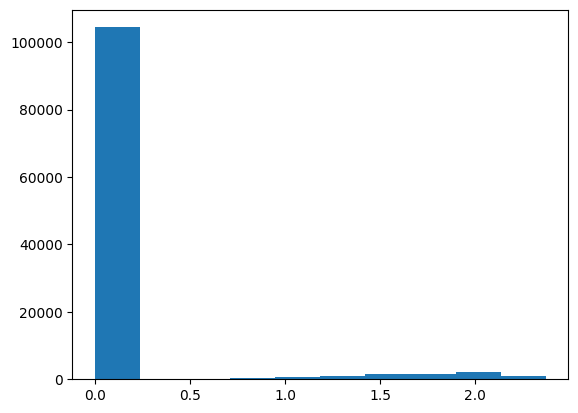

In [85]:
# plt.pcolormesh(WRF_radar_composite**0.25, cmap=plt.cm.jet)
# plt.colorbar()

plt.hist(WRF_radar_composite.ravel()**0.25);

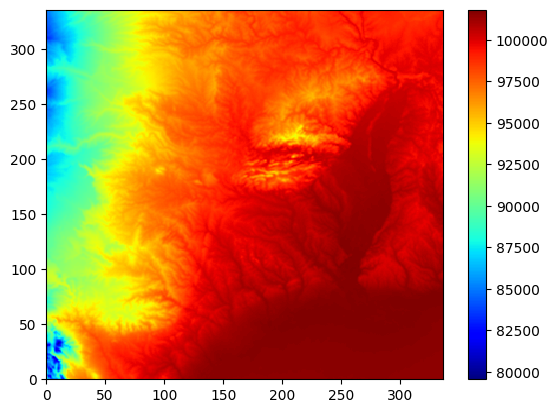

In [64]:
plt.pcolormesh(WRF_P[0, ...], cmap=plt.cm.jet)
plt.colorbar()

(array([   61.,   505.,  7822., 11346., 11558.,  9828., 23198., 25283.,
        19125.,  4170.]),
 array([0.05138509, 0.05811948, 0.06485388, 0.07158827, 0.07832266,
        0.08505706, 0.09179145, 0.09852584, 0.10526024, 0.11199463,
        0.11872903]),
 <BarContainer object of 10 artists>)

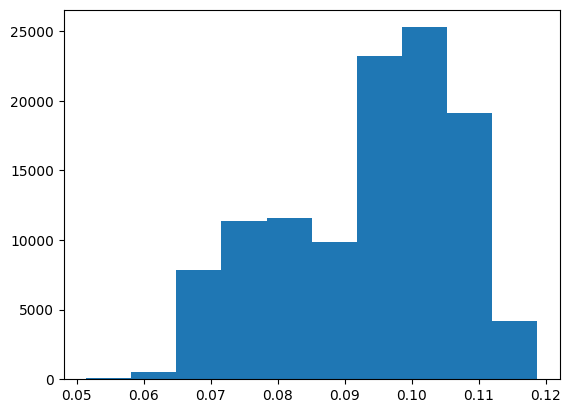

In [38]:
plt.hist(WRF_PWAT.ravel()**0.5)

(array([1.11713e+05, 5.35000e+02, 1.94000e+02, 1.03000e+02, 9.70000e+01,
        9.90000e+01, 6.80000e+01, 5.40000e+01, 2.60000e+01, 7.00000e+00]),
 array([  0.        ,  36.98044586,  73.96089172, 110.94132996,
        147.92178345, 184.90222168, 221.88265991, 258.86309814,
        295.84356689, 332.82400513, 369.80444336]),
 <BarContainer object of 10 artists>)

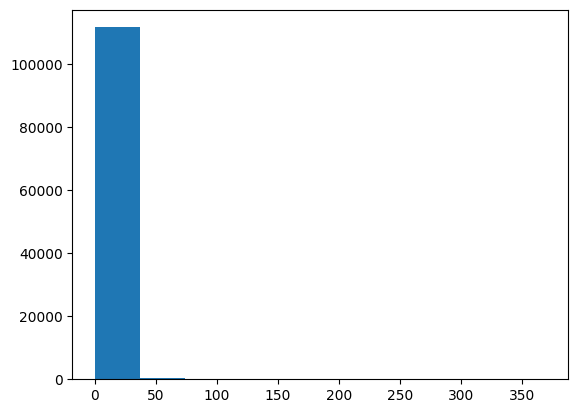

In [14]:
plt.hist(1000*WRF_precip.ravel())

(array([91769., 13877.,  2580.,  1808.,  1180.,   735.,   388.,   220.,
          215.,   124.]),
 array([0.        , 0.07798176, 0.15596351, 0.23394528, 0.31192702,
        0.38990879, 0.46789056, 0.54587233, 0.62385404, 0.70183581,
        0.77981758]),
 <BarContainer object of 10 artists>)

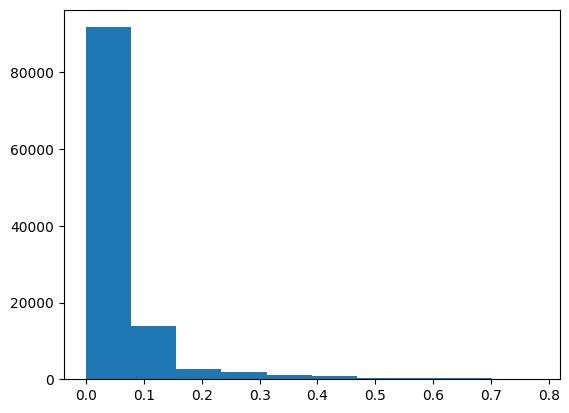

In [31]:
plt.hist(WRF_precip.ravel()**0.25)

(array([106207.,   1615.,   1176.,   1061.,    884.,    688.,    511.,
           308.,    236.,    210.]),
 array([0.        , 0.59156746, 1.18313491, 1.77470243, 2.36626983,
        2.95783734, 3.54940486, 4.14097214, 4.73253965, 5.32410717,
        5.91567469]),
 <BarContainer object of 10 artists>)

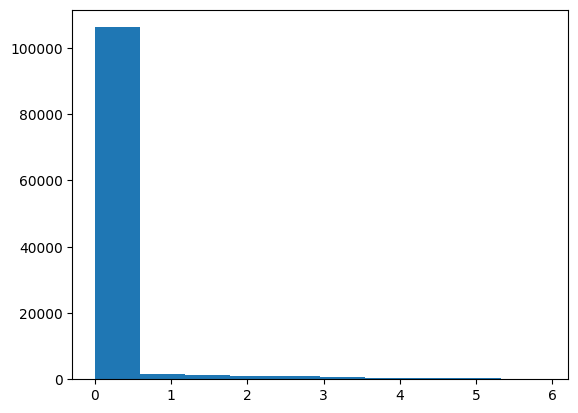

In [15]:
plt.hist(np.log(1000*WRF_precip.ravel()+1))

In [21]:
WRF_Q.shape

(16, 336, 336)

(array([2.1000e+01, 1.5700e+02, 9.8300e+02, 3.1850e+03, 5.1530e+03,
        6.8110e+03, 8.9780e+03, 1.4747e+04, 2.6312e+04, 4.6549e+04]),
 array([ 78453.921875 ,  80647.1875   ,  82840.453125 ,  85033.71875  ,
         87226.984375 ,  89420.25     ,  91613.5234375,  93806.7890625,
         96000.0546875,  98193.3203125, 100386.5859375]),
 <BarContainer object of 10 artists>)

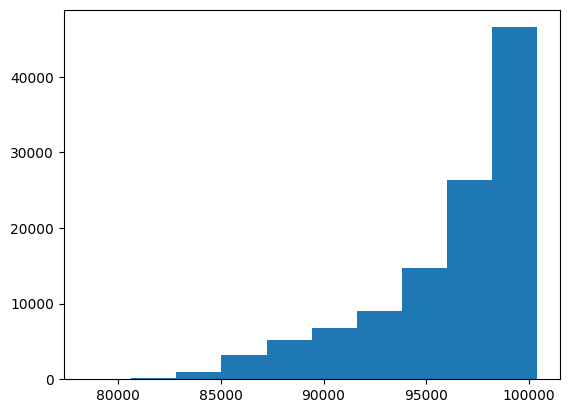

In [69]:
plt.hist(WRF_P[1, ...].ravel())